# Portfolio - 1

### Analysis of Cycling data

***Student ID → 46277404***

***Student name → Mohammed Rizwan Amanullah***

***Github repository link →*** [https://github.com/MQCOMP6200/portfolio-s1-2021-mohrizwan1993](https://github.com/MQCOMP6200/portfolio-s1-2021-mohrizwan1993)

# Introduction

The aim of this portfolio is to perform analysis on Strava, cheetah and weather dataset.

### **Analysis to be performed**

- Distributions of some key variables: time, distance, average speed, average power, TSS. Check whether they are normally distributed.
- Explore the relationship between variables and check the correlation between them.
- Explore the difference between three workout type: Ride, Race and workout
- Join the weather dataset and explore the relationship between ride and weather.
    - Find relationship between distance travelled and the temperature
    - Find relationship between average speed and temperature

## Loading the libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline

## Loading Data

In [2]:
# loading strava dataset
strava = pd.read_csv('data/portfolio_1/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


In [3]:
# loading cheetah dataset
cheetah = pd.read_csv('data/portfolio_1/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


### Joining the strava and cheetah dataset

In [4]:
joined_df = strava.join(cheetah, how="inner")
joined_df.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


In [5]:
print(f"The Strava data frame has {strava.shape[0]} rows and {strava.shape[1]} columns")
print(f"The cheetah data frame has {cheetah.shape[0]} rows and {cheetah.shape[1]} columns")
print(f"The joined data frame has {joined_df.shape[0]} rows and {joined_df.shape[1]} columns")

The Strava data frame has 268 rows and 10 columns
The cheetah data frame has 251 rows and 362 columns
The joined data frame has 243 rows and 372 columns


## Analysis 1:- Removing rides that has no measured power

In [6]:
#lets create a data frame (joined_df1) where values of the device_watts is true
joined_df1 = joined_df[joined_df['device_watts']== True]
print(f"The new data frame having device_watts value as true has {joined_df1.shape[0]} rows and {joined_df1.shape[1]} columns")

The new data frame having device_watts value as true has 205 rows and 372 columns


In [7]:
#Checking if there is any false values
print(f"You can see the joined data frame has only TRUE values :- {joined_df1['device_watts'].value_counts()}")

You can see the joined data frame has only TRUE values :- True    205
Name: device_watts, dtype: int64


## Analysis 2:- Distribution of key variables

### 2.1 Distribution of Distance variable

0.5132584678230234

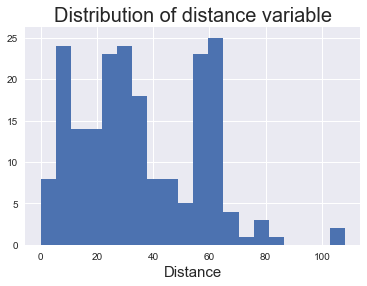

In [8]:
joined_df1['distance'].hist(histtype = "stepfilled", bins=20)
plt.xlabel("Distance", fontsize=15)
plt.title("Distribution of distance variable", fontsize=20)
joined_df1['distance'].skew()

### Analysis
Calculated skewness value is 0.513. The skewness value along with histogram shows that it is possitively skewed. Since the value is between 0.5 and 1 we can conclude that it is moderately skewed. Furthermore, we can say that direction of outliers is on the right side.

### 2.2 Distribution of moving_time variable

Skew value for moving time 0.5636319808541944


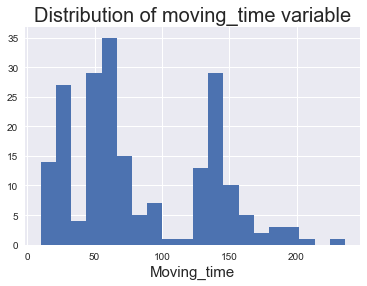

In [9]:
joined_df1['moving_time'].hist(histtype = "stepfilled", bins=20)
plt.xlabel("Moving_time", fontsize=15)
plt.title("Distribution of moving_time variable", fontsize=20)
print(f"Skew value for moving time {joined_df1['moving_time'].skew()}")

### Analysis
Histogram of moving time variable shows that it is possitively skewed. The skewness value further confirms our findings.

### 2.3 Distribution of Average speed

Skew value for average speed 0.43621318841282203


Text(0.5, 1.0, 'Distribution of Average Speed variable')

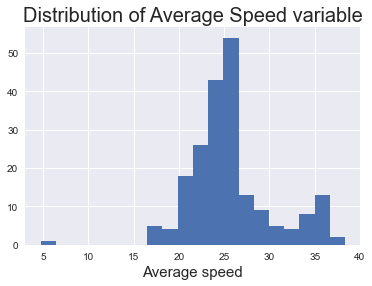

In [10]:
joined_df1['Average Speed'].hist(histtype = "stepfilled", bins=20)
print(f"Skew value for average speed {joined_df1['Average Speed'].skew()}")
plt.xlabel("Average speed", fontsize=15)
plt.title("Distribution of Average Speed variable", fontsize=20)

### Analysis
Average speed is possitively skewed. And the skewness value 0.4 shows that it is slightly skewed.

### 2.4 Distribution of Average Power

Skew value for average power 0.5408197937668117


Text(0.5, 1.0, 'Distribution of Average Power variable')

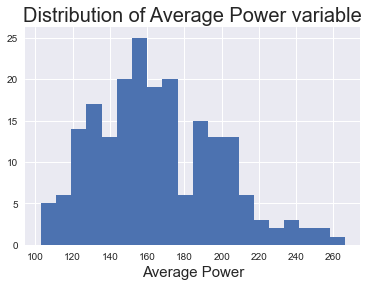

In [11]:
joined_df1['Average Power'].hist(histtype = "stepfilled", bins=20)
print(f"Skew value for average power {joined_df1['Average Power'].skew()}")
plt.xlabel("Average Power", fontsize=15)
plt.title("Distribution of Average Power variable", fontsize=20)

### Analysis
From the histogram we can see that average power is possitively skewed. As the value of skewness is between 0.5 to 1, we can say that it is moderately skewed.

### 2.5 Distribution of  TSS

Text(0.5, 1.0, 'Distribution of TSS variable')

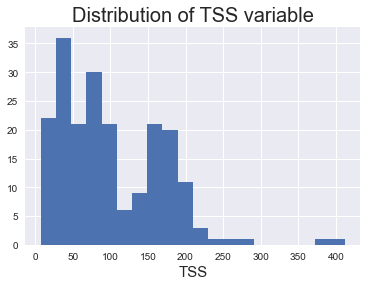

In [12]:
joined_df1['TSS'].hist(histtype = "stepfilled", bins=20)
joined_df1['TSS'].skew()
plt.xlabel("TSS", fontsize=15)
plt.title("Distribution of TSS variable", fontsize=20)

### Analysis
We can see that the TSS is possitively skewed from the histogram. And the value of skweness shows that it is highly skewed. 

# Analysis 3 - Exploring relationship between variables

## Distance vs moving_time

Text(0, 0.5, 'Moving time')

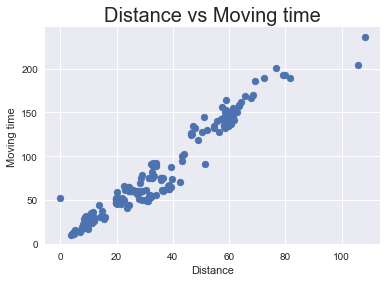

In [13]:
plt.scatter(x=joined_df1['Distance'], y=joined_df1['moving_time'])
plt.title("Distance vs Moving time", fontsize=20)
plt.xlabel("Distance")
plt.ylabel("Moving time")

In [14]:
print(f"Correlation value between distance and time is {joined_df1.corrwith(joined_df1['moving_time']).loc['distance']}")

Correlation value between distance and time is 0.972259751024426


## Analysis

We can see that there is a strong possitive linear relationship between the variable distance and time. And the correltion coefficient 0.97 shows the same.

## Average speed vs average heart rate

Text(0, 0.5, 'Average heartrate')

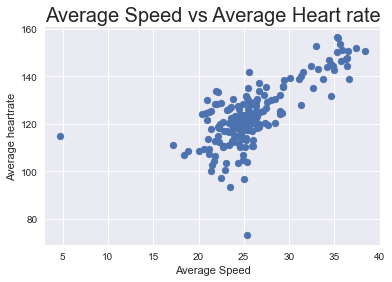

In [15]:
plt.scatter(x=joined_df1['Average Speed'], y=joined_df1['average_heartrate'])
plt.title("Average Speed vs Average Heart rate", fontsize=20)
plt.xlabel("Average Speed")
plt.ylabel("Average heartrate")

In [16]:
print(f"Correlation value between average speed and heart rate is{joined_df1.corrwith(joined_df1['Average Speed']).loc['average_heartrate']}")

Correlation value between average speed and heart rate is0.7268578878753806


### Analysis

There is a strong possitive linear relationship between average speed and heart rate. Scatter plot and correlation value reflects the same.

## Elevation gain vs Speed

Text(0, 0.5, 'Average speed')

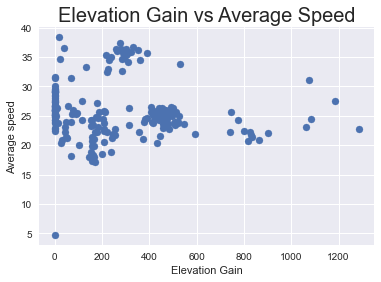

In [17]:
plt.scatter(x=joined_df1['Elevation Gain'], y=joined_df1['Average Speed'])
plt.title("Elevation Gain vs Average Speed", fontsize=20)
plt.xlabel("Elevation Gain")
plt.ylabel("Average speed")

In [18]:
print(f"Correlation value between average speed and heart rate is{joined_df1.corrwith(joined_df1['Elevation Gain']).loc['Average Speed']}")

Correlation value between average speed and heart rate is-0.07841926060888273


### Analysis
We can see that there is a negative correlation between elevation gain and average speed. The correlation value is close to zero, so we can conclude that there is no strong relationship between both variables.

## Normalised Power vs Elevation gain

Text(0, 0.5, 'Normalised power')

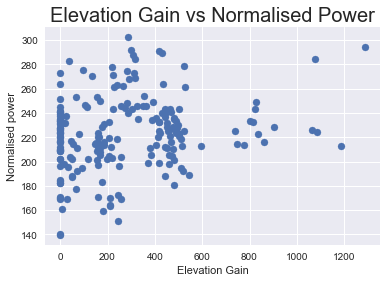

In [19]:
plt.scatter(x=joined_df1['Elevation Gain'], y=joined_df1['NP'])
plt.title("Elevation Gain vs Normalised Power", fontsize=20)
plt.xlabel("Elevation Gain")
plt.ylabel("Normalised power")

In [20]:
print(f"Correlation value between elevation gain and normalised power is {joined_df1.corrwith(joined_df1['Elevation Gain']).loc['NP']}")

Correlation value between elevation gain and normalised power is 0.22862185778583738


### Analysis
There is a possitive relationship between elevation gain and normalised power. But the value is close to zero shows that the relationship is weak.

## Training stress score(TSS) vs distance

Text(0, 0.5, 'TSS')

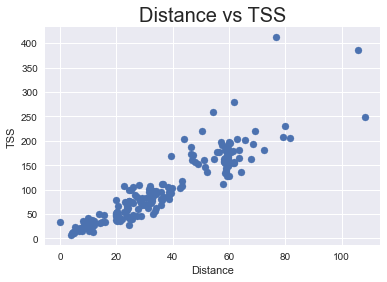

In [21]:
plt.scatter(x=joined_df1['Distance'], y=joined_df1['TSS'])
plt.title("Distance vs TSS", fontsize=20)
plt.xlabel("Distance")
plt.ylabel("TSS")

In [22]:
print(f"Correlation value between distance and TSS is {joined_df1.corrwith(joined_df1['Distance']).loc['TSS']}")

Correlation value between distance and TSS is 0.9200562152510432


### Analysis
We can see there is a strong Possitive relationship between Distance and TSS and the correlation coefficient shows that both variable have strong relationship.

# Analysis 4 - Exploring Race, Workout and Ride

### Analysing Distance and Heart rate for workout types

Text(0, 0.5, 'Average heartrate')

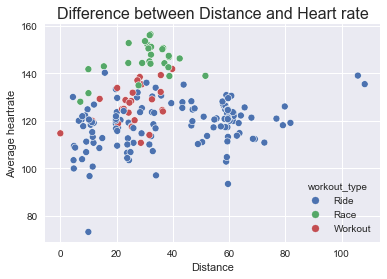

In [23]:
import seaborn as sns

sns.scatterplot(data=joined_df1, x=joined_df1['Distance'], y=joined_df1['average_heartrate'], hue=joined_df1['workout_type'])
plt.title("Difference between Distance and Heart rate", fontsize=16)
plt.ylabel("Average heartrate")

### Analysis
We can see that heart rate is higher for race compared to ride and workout. On the other hand, the distance covered in race is low when compared to ride and workout. Meanwhile, the ride has consistent heart rate as a result the distance covered is also higher which shows the ride is not a high intensity workout type.

### Analysing Average speed and Heart rate

Text(0, 0.5, 'Average heartrate')

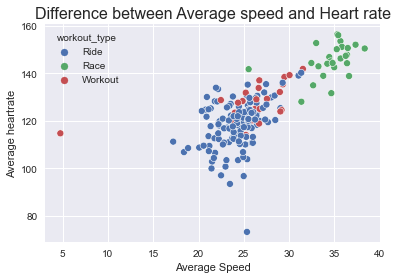

In [24]:
sns.scatterplot(data=joined_df1, x=joined_df1['Average Speed'], y=joined_df1['average_heartrate'], hue=joined_df1['workout_type'])
plt.title("Difference between Average speed and Heart rate", fontsize=16)
plt.ylabel("Average heartrate")

### Analysis
As the race involves involvement with high speed, we can see that race has higher heart rate than that of ride and workout. Heart rate is consistent for Ride as the activity is performed at lower speed compared to race and workout.

### Analysing Distance and Moving time

Text(0, 0.5, 'Moving time')

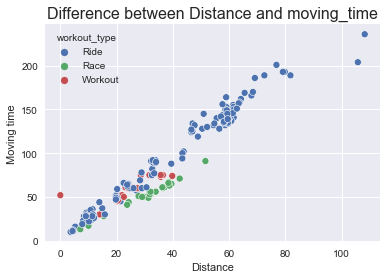

In [25]:
sns.scatterplot(data=joined_df1, x=joined_df1['Distance'], y=joined_df1['moving_time'], hue=joined_df1['workout_type'])
plt.title("Difference between Distance and moving_time", fontsize=16)
plt.ylabel("Moving time")

### Analysis
Distance covered is highest for rides than that of workout and race. But moving time to cover the same distance is lowest for Race when compared with rides and workout. 


## Comparing TSS between workout types

Text(0.5, 1.0, 'TSS')

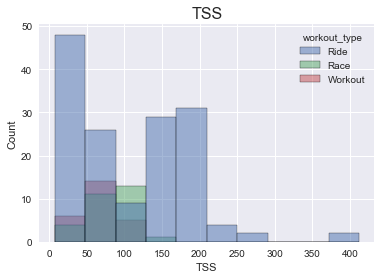

In [26]:
sns.histplot(data=joined_df1, x='TSS', hue='workout_type', bins=10)
plt.title("TSS", fontsize=16)

### Analysis
We can see that TSS is highest for ride comapred with race and workout. This may be because the ride was performed for longer time and distance. Furthermore, we can see that ride has lowest TSS value as well. Which shows that rides were done on shorter distance. But the workout and Race has lowest value as it is performed for shorter period of time.

## Comparing moving time between different workout

Text(0.5, 1.0, 'Time')

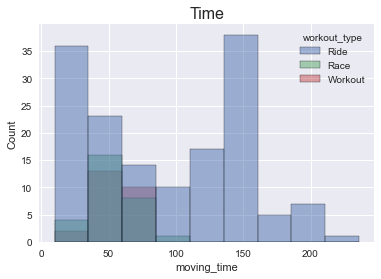

In [27]:
sns.histplot(data=joined_df1, x='moving_time', hue='workout_type')
plt.title("Time", fontsize=16)

### Analysis
As expected, the ride time is the highest compared with race and workout. We can also notice that workout is performed for considerably longer time than that of Race.

# Analysis 5:- Analysis of rides and  weather data

In [28]:
weather_2018 = pd.read_csv('data/portfolio_1/weather_data_2018.csv')
weather_2019 = pd.read_csv('data/portfolio_1/weather_data_2019.csv')

In [29]:
#shape of 2018 weather dataser
weather_2018.shape

(365, 8)

In [30]:
weather_2019.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,66212,2019,1,1,34.0,1.0,Y
1,IDCJAC0010,66212,2019,1,2,30.6,1.0,Y
2,IDCJAC0010,66212,2019,1,3,28.9,1.0,Y
3,IDCJAC0010,66212,2019,1,4,33.7,1.0,Y
4,IDCJAC0010,66212,2019,1,5,39.3,1.0,Y


In [31]:
#Shape of the 2019 weather dataset
weather_2019.shape

(365, 8)

In [32]:
#creating a list of 2018 and 2019 weather dataset
frame = [weather_2018, weather_2019]

In [33]:
#concating 2018 and 2019 weather dataset
weather = pd.concat(frame)

In [34]:
#shape of the merged dataset
weather.shape

(730, 8)

In [35]:
#creating a date column that is od format year:Month:day
weather['date'] = pd.to_datetime(weather[["Year", "Month", "Day"]])

In [36]:
weather.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,date
0,IDCJAC0010,66212,2018,1,1,30.9,1.0,Y,2018-01-01
1,IDCJAC0010,66212,2018,1,2,28.8,1.0,Y,2018-01-02
2,IDCJAC0010,66212,2018,1,3,25.3,1.0,Y,2018-01-03
3,IDCJAC0010,66212,2018,1,4,25.4,1.0,Y,2018-01-04
4,IDCJAC0010,66212,2018,1,5,28.9,1.0,Y,2018-01-05


In [37]:
#setting date as a index column
weather.set_index(weather['date'], inplace=True)

In [38]:
#showing that date is index column
weather.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,date
date,,,,,,,,,
2018-01-01,IDCJAC0010,66212,2018,1,1,30.9,1.0,Y,2018-01-01
2018-01-02,IDCJAC0010,66212,2018,1,2,28.8,1.0,Y,2018-01-02
2018-01-03,IDCJAC0010,66212,2018,1,3,25.3,1.0,Y,2018-01-03
2018-01-04,IDCJAC0010,66212,2018,1,4,25.4,1.0,Y,2018-01-04
2018-01-05,IDCJAC0010,66212,2018,1,5,28.9,1.0,Y,2018-01-05


In [39]:
#stripping time from the joined strava and cheetah dataframe
joined_df1.index = pd.to_datetime(joined_df1.index).date

In [40]:
#Creating a new dataframe by joining joined_df1 and weather dataframe
joined_df2 = joined_df1.merge(weather, left_index=True, right_index=True)

In [41]:
joined_df2.shape

(205, 381)

In [42]:
#displaying the nessary column to analyse from the dataframe
joined_df2[['distance', 'Maximum temperature (Degree C)', 'Average Speed']]

,distance,Maximum temperature (Degree C),Average Speed
2018-01-27,7.6,30.4,26.0234
2018-01-27,38.6,30.4,34.4380
2018-02-05,24.3,27.4,22.2417
2018-02-07,47.1,28.1,20.7841
2018-02-09,59.8,31.9,25.6585
...,...,...,...
2019-07-19,58.2,20.5,25.4524
2019-07-26,59.6,19.0,25.5036
2019-07-27,19.8,20.3,24.3316
2019-07-27,29.1,20.3,34.8044


## Relationship between temperature and distance

In [43]:
#figuring out the relationship between maximum temperature and distance
print(f"The correlation coefficient between Maximum temperature and distance is {joined_df2.corrwith(joined_df2['Maximum temperature (Degree C)']).loc['distance']}")

The correlation coefficient between Maximum temperature and distance is 0.0049288491701383556


Text(0.5, 1.0, 'Maximum Temperature vs Distance')

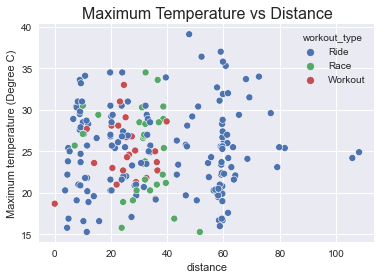

In [44]:
#scatter plotting to see how data is distributed among different categories
sns.scatterplot(x=joined_df2['distance'], 
                y=joined_df2['Maximum temperature (Degree C)'], 
                hue=joined_df2['workout_type'])
plt.title("Maximum Temperature vs Distance", fontsize=16)

### Analysis

We can see that there is a weak relationship between the distance and maximum temperature. But when we analyse the Ride data, we can see that lot of data is clustered around the region where the temerature recorded is low. Also, the distance covered is higher for rides when temperature is in between 20 and 30. For the race category, the distance is consistant irrespective of the temperature.

## Relationship between Speed and temperature

In [45]:
print(f"The correlation coefficient between Maximum temperature and speed is {joined_df2.corrwith(joined_df2['Maximum temperature (Degree C)']).loc['Average Speed']}")

The correlation coefficient between Maximum temperature and speed is -0.06668156392663972


Text(0.5, 1.0, 'Maximum Temperature vs Average speed')

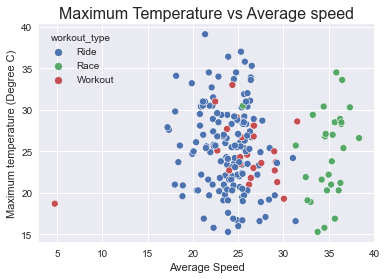

In [46]:
sns.scatterplot(x=joined_df2['Average Speed'], 
                y=joined_df2['Maximum temperature (Degree C)'], 
                hue=joined_df2['workout_type'])
plt.title("Maximum Temperature vs Average speed", fontsize=16)

### Analysis
We can see the correlation coefficient is negative between average speed and temperature. But the value is extremely close to zero which shows the relationship is extremely weak.

# Conclusion

In this portfolio, we have performed analysis on some key variables and found the relationship between them. Additionally, with the help of weather data we analysed whether there is a relationship between temperature and distance covered.